<a href="https://colab.research.google.com/github/Salma-Kassem/DeepLearning/blob/main/LiteRT_(EXTRA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LiteRT Example MobileNetV1

Install LiteRT Package

In [ ]:
!pip install ai-edge-litert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.8 MB/s eta 0:00:00


In [ ]:
from ai_edge_litert.interpreter import Interpreter ## Used to load a saved model in (.tflite) file format
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

File Chooser

In [ ]:
def upload_files():
    from google.colab import files
    uploaded = files.upload()
    for k, v in uploaded.items():
        open(k, 'wb').write(v)
    return list(uploaded.keys())

Choose one or more Image Files

In [ ]:
images = upload_files()

Saving cat.jpg to cat.jpg
Saving dog.jpeg to dog.jpeg


In [ ]:
print(images)

['cat.jpg', 'dog.jpeg']


Create LiteRT Interpreter

In [ ]:
interpreter.get_input_details()[0]

{'name': 'serving_default_keras_tensor_400:0',
 'index': 0,
 'shape': array([  1, 150, 150,   3], dtype=int32),
 'shape_signature': array([ -1, 150, 150,   3], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0),
 'quantization_parameters': {'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [ ]:
interpreter.get_output_details()[0]

{'name': 'StatefulPartitionedCall_1:0',
 'index': 227,
 'shape': array([1, 1], dtype=int32),
 'shape_signature': array([-1,  1], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0),
 'quantization_parameters': {'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [ ]:
interpreter.get_input_details()[0]["shape"][1:3]

array([150, 150], dtype=int32)

In [ ]:
## Need to upload this file to the Notebook runtime
interpreter = Interpreter(model_path='mobilenet_v1_1.0_224_quant.tflite') ## Pretrained on ImageNet dataset

## Allocate input and output tensors to be used later to send an input image to
## the interpreter model and retrieve its output (predictions) on the output tensor.
interpreter.allocate_tensors()

# Get input and output tensor details.
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

{'name': 'serving_default_keras_tensor_400:0', 'index': 0, 'shape': array([  1, 150, 150,   3], dtype=int32), 'shape_signature': array([ -1, 150, 150,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


Create labels list of ImageNet dataset class names.

In [ ]:
def load_labels(filename):
  with open(filename, 'r') as f:
    return [line.strip() for line in f.readlines()]

## Need to upload this file to the Notebook runtime
labels = load_labels('labels.txt')
print(labels)

['cat', 'dog']


Preprocess image, invoke interpreter and show predictions.

In [ ]:
def predict_and_show(image_path, labels, input_size=(224, 224)):
    ### Resize and Rescale Image
    image = Image.open(image_path)
    print(image.size)
    new_image = (np.array(image.resize(input_size)) / 255.0).astype(np.float32)

    ### Set input tensor with input image
    input_shape = input_details['shape']
    input_data = new_image.reshape(input_shape)
    print(input_data.shape)
    interpreter.set_tensor(input_details['index'], input_data)

    ### Inference
    interpreter.invoke()

    ### Show image
    plt.figure(figsize=(2, 2))
    plt.imshow(new_image)
    plt.axis('off')
    plt.show()

    ### Get interpreter's predictions from output tensor
    output_data = interpreter.get_tensor(output_details['index'])
    print(output_data)
    results = np.squeeze(output_data)
    print(results.shape, list(results))
    floating_model = input_details['dtype'] == np.float32
    top_k = results.argsort()[-5:][::-1]
    for i in top_k:
        if floating_model:
            print('{:04.2f}%: {}'.format(float(results[i]), labels[i]))
        else:
            print('{:04.2f}%: {}'.format(float(results[i] / 255.0*100), labels[i]))

(640, 427)
(1, 150, 150, 3)


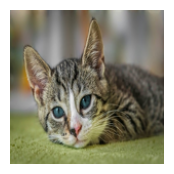

[[0.00221248]]
cat
(500, 667)
(1, 150, 150, 3)


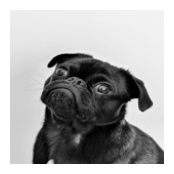

[[0.98606104]]
dog


In [ ]:
for image in images:
    predict_and_show(image, labels, input_size=tuple(input_details["shape"][1:3]))

(4032, 3024)
(1, 150, 150, 3)


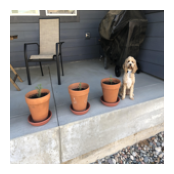

[[0.20768155]]
cat


In [ ]:
predict_and_show("dog_plants.jpeg", labels, input_size=tuple(input_details["shape"][1:3]))

## LiteRT Example CustomModel (mymodel.tflite)

In [ ]:
from ai_edge_litert.interpreter import Interpreter ## Used to load a saved model in (.tflite) file format
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

File Chooser

In [ ]:
def upload_files():
    from google.colab import files
    uploaded = files.upload()
    for k, v in uploaded.items():
        open(k, 'wb').write(v)
    return list(uploaded.keys())

Upload dog and cat images only.

In [ ]:
images = upload_files()

Saving cat.jpg to cat.jpg
Saving dog.jpeg to dog.jpeg


In [ ]:
print(images)

['cat.jpg', 'dog.jpeg']


Create LiteRT Interpreter

In [ ]:
interpreter.get_input_details()[0]

{'name': 'serving_default_keras_tensor_400:0',
 'index': 0,
 'shape': array([  1, 150, 150,   3], dtype=int32),
 'shape_signature': array([ -1, 150, 150,   3], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0),
 'quantization_parameters': {'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [ ]:
interpreter.get_output_details()[0]

{'name': 'StatefulPartitionedCall_1:0',
 'index': 227,
 'shape': array([1, 1], dtype=int32),
 'shape_signature': array([-1,  1], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0),
 'quantization_parameters': {'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [ ]:
interpreter.get_input_details()[0]["shape"][1:3]

array([150, 150], dtype=int32)

In [ ]:
interpreter = Interpreter(model_path='mymodel.tflite')
print(interpreter.get_input_details()[0])
interpreter.allocate_tensors()
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

{'name': 'serving_default_keras_tensor_400:0', 'index': 0, 'shape': array([  1, 150, 150,   3], dtype=int32), 'shape_signature': array([ -1, 150, 150,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [ ]:
labels = ["cat", "dog"]
print(labels)

['cat', 'dog']


In [ ]:
def predict_and_show(image_path, labels, input_size=(224, 224)):
    ## Resize Image
    image = Image.open(image_path)
    print(image.size)
    new_image = (np.array(image.resize(input_size))/255.0).astype(np.float32)

    # Test the model on random input data.
    input_shape = input_details[0]['shape']
    input_data = new_image.reshape(input_shape)
    print(input_data.shape)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    ### Inference
    interpreter.invoke()

    ### Show image
    plt.figure(figsize=(2, 2))
    plt.imshow(new_image)
    plt.axis('off')
    plt.show()

    ### Get interpreter's predictions from output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print(output_data)
    results = int(np.round(np.squeeze(output_data)))
    print(labels[results])

(640, 427)
(1, 150, 150, 3)


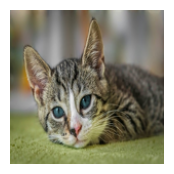

[[0.00221248]]
cat
(500, 667)
(1, 150, 150, 3)


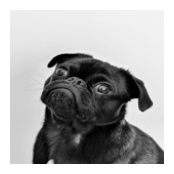

[[0.98606104]]
dog


In [ ]:
for image in images:
    predict_and_show(image, labels, input_size=tuple(input_details[0]["shape"][1:3]))

(4032, 3024)
(1, 150, 150, 3)


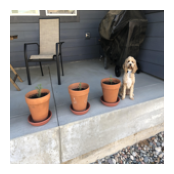

[[0.20768155]]
cat


In [ ]:
predict_and_show("dog_plants.jpeg", labels, input_size=tuple(input_details[0]["shape"][1:3]))